In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import Sequential
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten,Activation, Dense, Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn
import cv2
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [2]:
Daisy_dr = "C:\\Users\\Meghanadh\\Downloads\\FLOWER_DATASET-20230822T111343Z-001\\FLOWER_DATASET\\Daisy"
Dandelion_dr = "C:\\Users\\Meghanadh\\Downloads\\FLOWER_DATASET-20230822T111343Z-001\\FLOWER_DATASET\\Dandelion"
Rose_dr = "C:\\Users\\Meghanadh\\Downloads\\FLOWER_DATASET-20230822T111343Z-001\\FLOWER_DATASET\\Rose"
Sunflower_dr = "C:\\Users\\Meghanadh\\Downloads\\FLOWER_DATASET-20230822T111343Z-001\\FLOWER_DATASET\\Sunflower"
Tulip_dr = "C:\\Users\\Meghanadh\\Downloads\\FLOWER_DATASET-20230822T111343Z-001\\FLOWER_DATASET\\Tulip"
IMG_SIZE=150
X = []
Z = [] 

In [3]:
def assign_label(img,flower_type):
    return flower_type

In [4]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        Z.append(str(label))

In [5]:
make_train_data('Daisy', Daisy_dr)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 764/764 [00:04<00:00, 179.30it/s]

764


In [6]:
make_train_data('Sunflower', Sunflower_dr)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 733/733 [00:04<00:00, 155.56it/s]

1497


In [7]:
make_train_data('Dandelion', Dandelion_dr)
print(len(X))

100%|█████████████████████████████████████████████████████████████████████████████| 1062/1062 [00:06<00:00, 176.04it/s]

2559


In [8]:
make_train_data('Tulip', Tulip_dr)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 984/984 [00:05<00:00, 167.27it/s]

3543


In [9]:
make_train_data('Rose', Rose_dr)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 784/784 [00:04<00:00, 180.27it/s]

4327


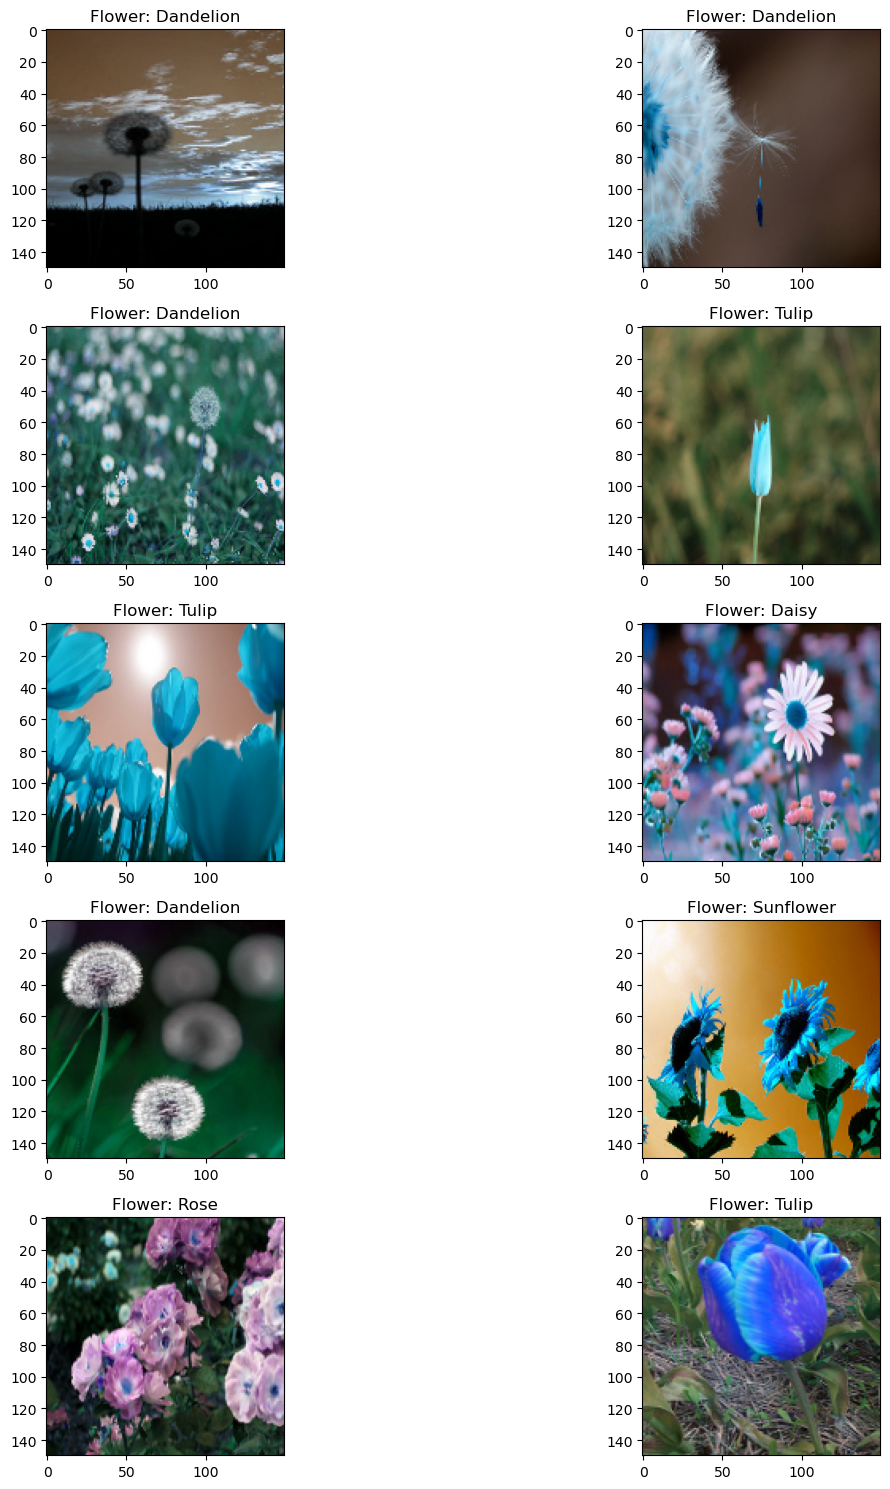

In [10]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])

plt.tight_layout()

In [11]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [13]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [14]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

In [16]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [17]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [18]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=False)

In [19]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 96)        0

In [21]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

C:\Users\Meghanadh\AppData\Local\Temp\ipykernel_11936\1698440258.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),


Epoch 1/50
25/25 [==============================] - 105s 4s/step - loss: 1.4538 - accuracy: 0.3648 - val_loss: 1.2173 - val_accuracy: 0.4547
Epoch 2/50
25/25 [==============================] - 97s 4s/step - loss: 1.2008 - accuracy: 0.4816 - val_loss: 1.0605 - val_accuracy: 0.6007
Epoch 3/50
25/25 [==============================] - 86s 3s/step - loss: 1.0839 - accuracy: 0.5714 - val_loss: 0.9721 - val_accuracy: 0.6229
Epoch 4/50
25/25 [==============================] - 82s 3s/step - loss: 1.0242 - accuracy: 0.5932 - val_loss: 0.9748 - val_accuracy: 0.6165
Epoch 5/50
25/25 [==============================] - 79s 3s/step - loss: 0.9557 - accuracy: 0.6333 - val_loss: 0.8760 - val_accuracy: 0.6673
Epoch 6/50
25/25 [==============================] - 79s 3s/step - loss: 0.9092 - accuracy: 0.6400 - val_loss: 0.8635 - val_accuracy: 0.6682
Epoch 7/50
25/25 [==============================] - 80s 3s/step - loss: 0.8740 - accuracy: 0.6631 - val_loss: 0.8479 - val_accuracy: 0.6506
Epoch 8/50
25/25 [=

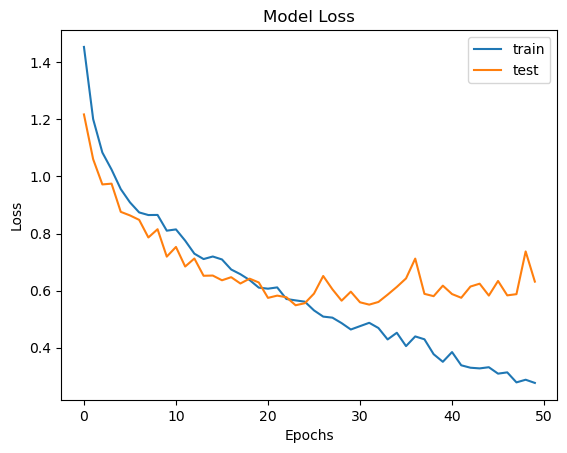

In [22]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

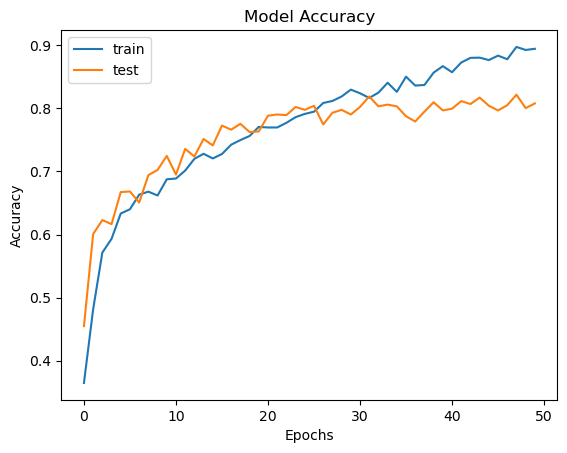

In [23]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [24]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

34/34 [==============================] - 6s 153ms/step


In [25]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

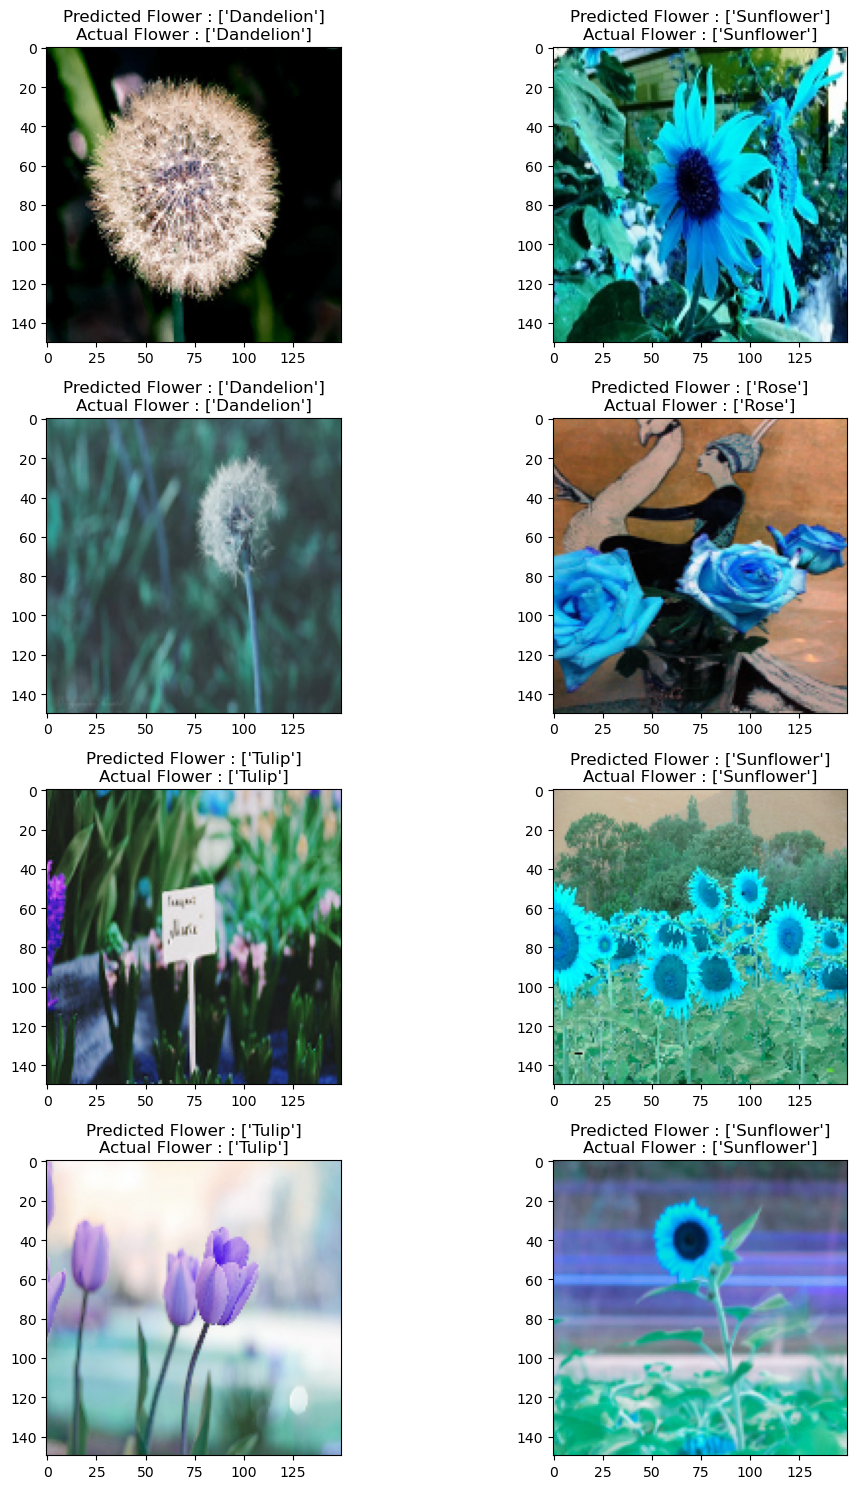

In [26]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[prop_class[count]])])))
        plt.tight_layout()
        count+=1

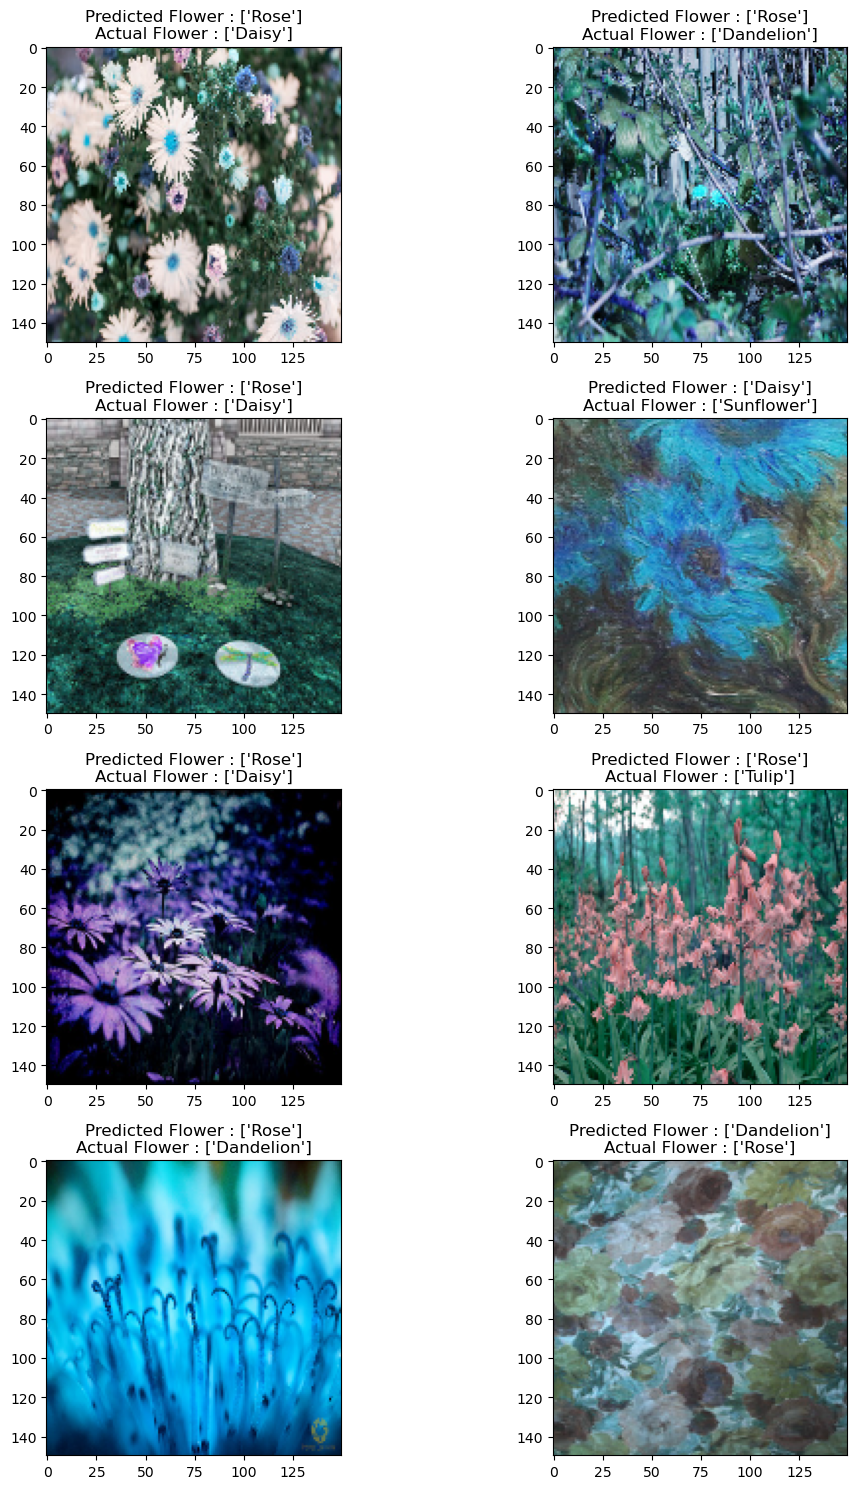

In [27]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[mis_class[count]])])))
        plt.tight_layout()
        count+=1

In [28]:
import pickle as pkl
filename = 'CNN_Model.pkl'
pkl.dump(model, open(filename, 'wb'))

In [29]:
cvscores = []
scores = model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 80.78%
80.78% (+/- 0.00%)
